In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [3]:
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

In [4]:
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [5]:
x_data.shape

(300, 1)

In [6]:
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

In [7]:
prediction = add_layer(l1, 10, 1, activation_function=None)

In [8]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))

In [9]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [10]:
# init = tf.initialize_all_variables() # tf 马上就要废弃这种写法
init = tf.global_variables_initializer()  # 替换成这样就好

In [11]:
sess = tf.Session()
sess.run(init)

In [12]:
for i in range(2000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 200 == 0:
        # to see the step improvement
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

0.377844
0.00453225
0.00375209
0.0150943
0.00313607
0.00879873
0.00393749
0.00346328
0.00493624
0.00394246


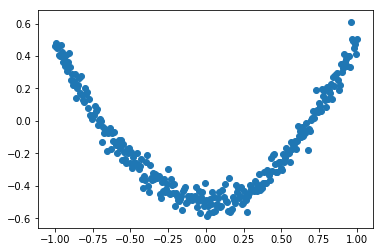

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
#plt.ion()#本次运行请注释，全局运行不要注释
plt.show()

In [22]:
# from time import sleep
# from time import time
# import random
# import time

for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        #plt.pause(0.1)
        plt.ion()#本次运行请注释，全局运行不要注释
        plt.show()
#plt.show()